# K-Means

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv("USArrests.csv").copy()
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
df.index = df.iloc[:,0]

In [4]:
df.index

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object', name='Unnamed: 0')

In [5]:
df = df.iloc[:,1:5]

In [6]:
df.head()

,Murder,Assault,UrbanPop,Rape
Unnamed: 0,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [14]:
df.index.name = "State"

In [16]:
df.head()

,Murder,Assault,UrbanPop,Rape
State,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [19]:
df.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


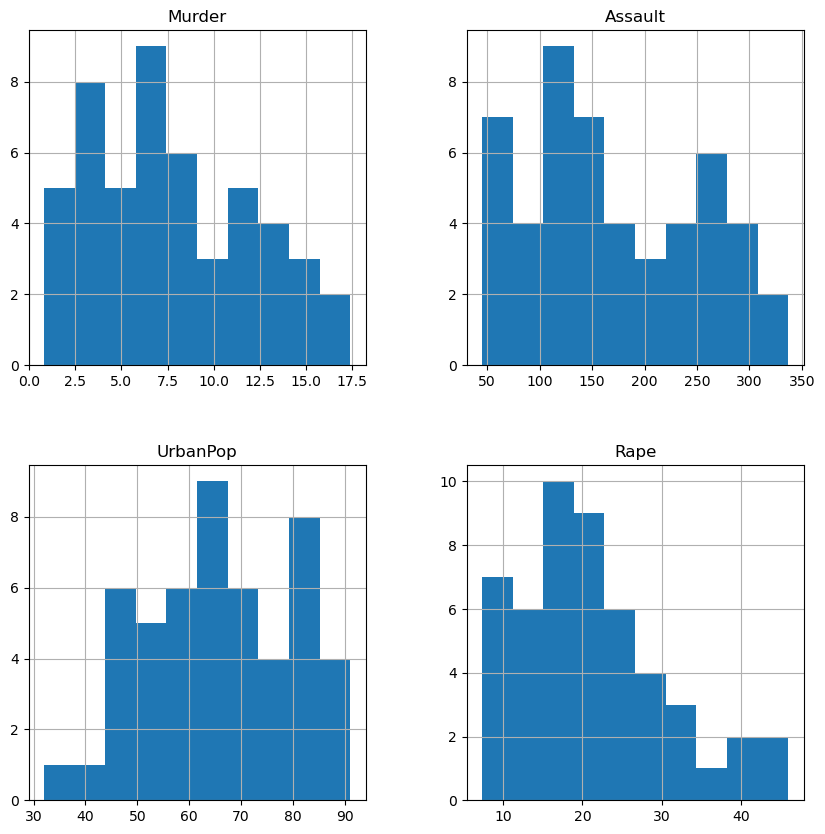

In [24]:
df.hist(figsize = (10,10));

# Model ve Görselleştirme

In [26]:
kmeans = KMeans(n_clusters = 4)

In [28]:
k_fit = kmeans.fit(df)

In [32]:
k_fit.n_clusters

4

In [33]:
k_fit.cluster_centers_

array([[  5.59      , 112.4       ,  65.6       ,  17.27      ],
       [ 11.8125    , 272.5625    ,  68.3125    ,  28.375     ],
       [  2.95      ,  62.7       ,  53.9       ,  11.51      ],
       [  8.21428571, 173.28571429,  70.64285714,  22.84285714]])

In [34]:
k_fit.labels_

array([1, 1, 1, 3, 1, 3, 0, 1, 1, 3, 2, 0, 1, 0, 2, 0, 0, 1, 2, 1, 3, 1,
       2, 1, 3, 0, 0, 1, 2, 3, 1, 1, 1, 2, 0, 3, 3, 0, 3, 1, 2, 3, 3, 0,
       2, 3, 3, 2, 2, 3])

# Görselleştirme

In [35]:
kmeans = KMeans(n_clusters = 2)
k_fit = kmeans.fit(df)

In [37]:
kumeler = k_fit.labels_

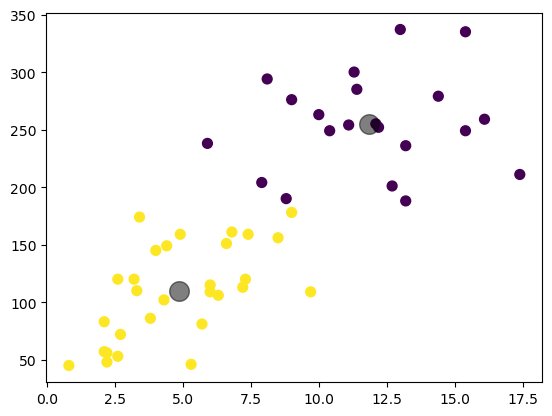

In [41]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], c =kumeler, s = 50, cmap = "viridis");

merkezler = k_fit.cluster_centers_
plt.scatter(merkezler[:,0], merkezler[:,1], c = "black", s = 200, alpha = 0.5);

In [42]:
from mpl_toolkits.mplot3d import Axes3D

In [44]:
kmeans = KMeans(n_clusters = 3)
k_fit = kmeans.fit(df)
kumeler = k_fit.labels_
merkezler = kmeans.cluster_centers_

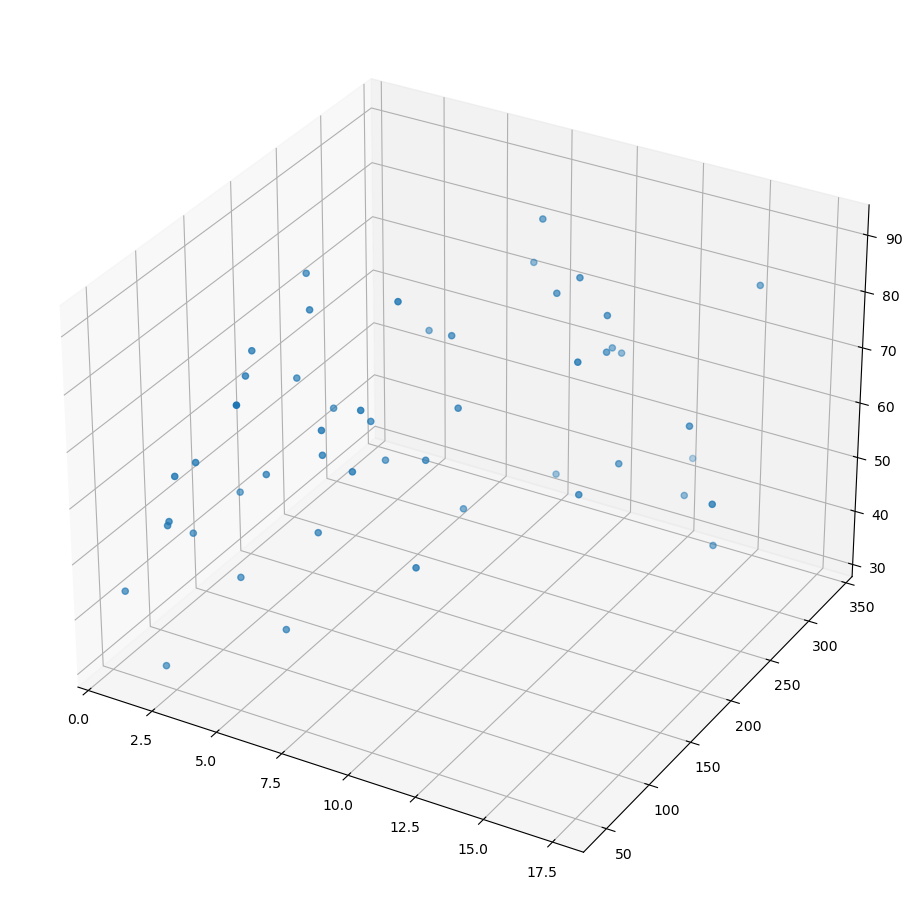

In [45]:
plt.rcParams['figure.figsize'] = (16, 9)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df.iloc[:, 0], df.iloc[:, 1], df.iloc[:, 2]);

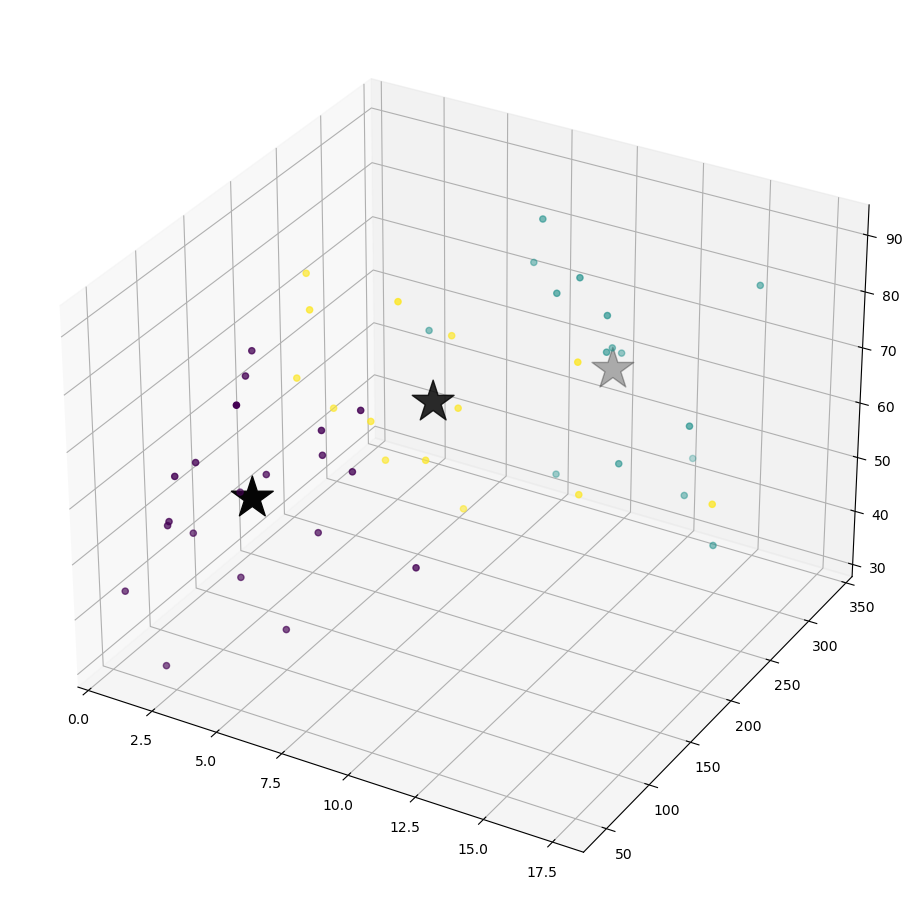

In [46]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df.iloc[:, 0], df.iloc[:, 1], df.iloc[:, 2], c=kumeler)
ax.scatter(merkezler[:, 0], merkezler[:, 1], merkezler[:, 2], marker='*', c='#050505', s=1000);

In [47]:
kmeans = KMeans(n_clusters = 3)
k_fit = kmeans.fit(df)
kumeler = k_fit.labels_

In [48]:
pd.DataFrame({"Eyaletler" : df.index, "Kumeler" : kumeler})[0:10]

,Eyaletler,Kumeler
0,Alabama,0
1,Alaska,0
2,Arizona,0
3,Arkansas,1
4,California,0
5,Colorado,1
6,Connecticut,2
7,Delaware,0
8,Florida,0
9,Georgia,1


In [49]:
df["kume_no"] = kumeler

In [50]:
df.head()

,Murder,Assault,UrbanPop,Rape,kume_no
State,,,,,
Alabama,13.2,236,58,21.2,0
Alaska,10.0,263,48,44.5,0
Arizona,8.1,294,80,31.0,0
Arkansas,8.8,190,50,19.5,1
California,9.0,276,91,40.6,0


In [51]:
df["kume_no"] = df["kume_no"] + 1

In [53]:
df.head()

,Murder,Assault,UrbanPop,Rape,kume_no
State,,,,,
Alabama,13.2,236,58,21.2,1
Alaska,10.0,263,48,44.5,1
Arizona,8.1,294,80,31.0,1
Arkansas,8.8,190,50,19.5,2
California,9.0,276,91,40.6,1


# Optimum Kume Sayısının Belirlenmesi

In [54]:
!pip install yellowbrick

     -------------------------------------- 282.6/282.6 kB 1.6 MB/s eta 0:00:00


In [55]:
from yellowbrick.cluster import KElbowVisualizer

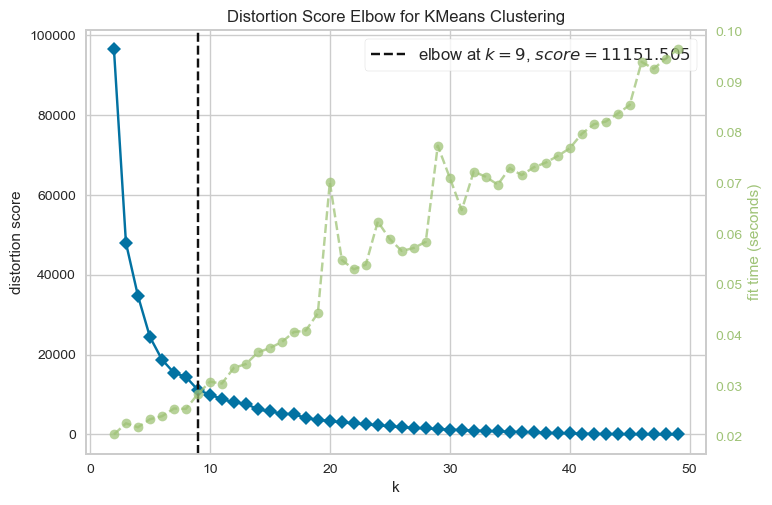

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [58]:
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,50))
visualizer.fit(df) 
visualizer.poof()  

In [63]:
kmeans = KMeans(n_clusters = 4)
k_fit = kmeans.fit(df)
kumeler = k_fit.labels_

In [64]:
pd.DataFrame({"Eyaletler" : df.index, "Kumeler": kumeler})[0:10]

,Eyaletler,Kumeler
0,Alabama,2
1,Alaska,2
2,Arizona,2
3,Arkansas,1
4,California,2
5,Colorado,1
6,Connecticut,3
7,Delaware,2
8,Florida,2
9,Georgia,1
